In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('dataset/partitioned_food101'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [9]:
import tensorflow
import keras
import glob
from skimage import io
import random
import skimage
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Random preprocessing

In [30]:
IMG = "934503.jpg"

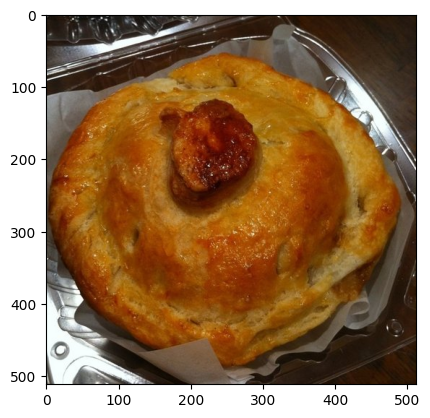

In [31]:
image = io.imread(IMG)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

To explore the RGB channels of the original image

Text(0.5, 0.98, 'Original & RGB image channels')

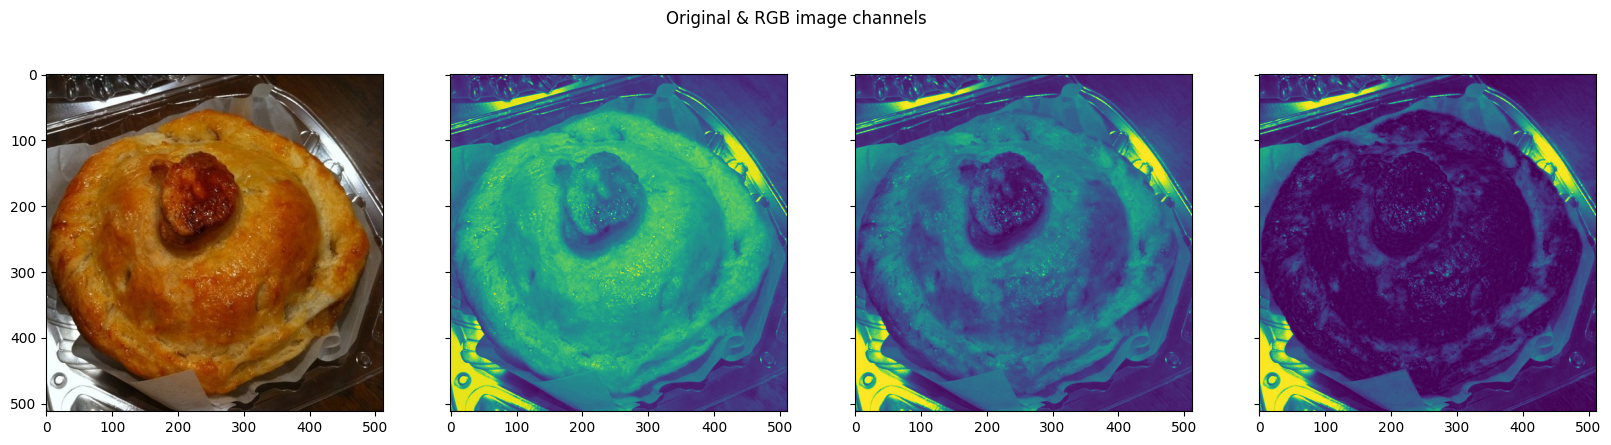

In [32]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

The grayscale

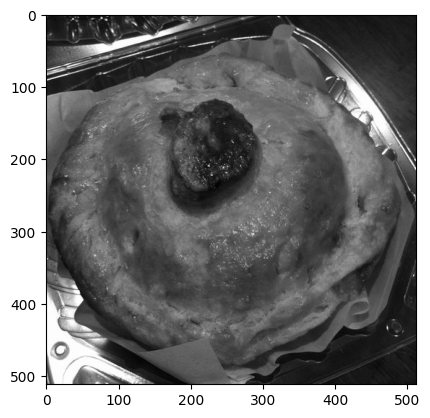

In [33]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

Normalization

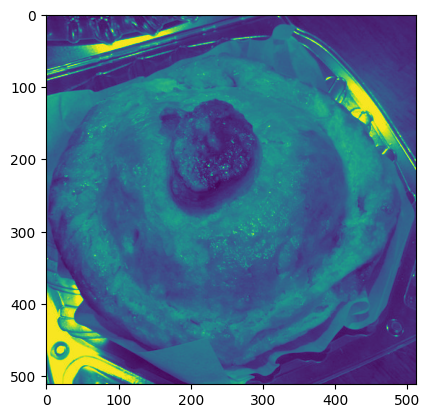

In [34]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

# Data augmentation

In [39]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

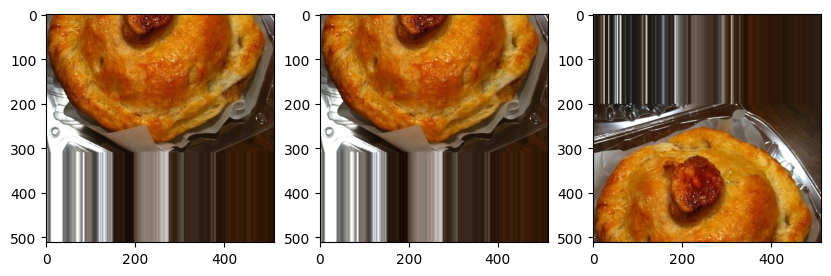

In [40]:
data = img_to_array(image)
samples = expand_dims(image, 0)

# create image data augmentation
datagen = ImageDataGenerator(width_shift_range=[-200,200])

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

Random fliping

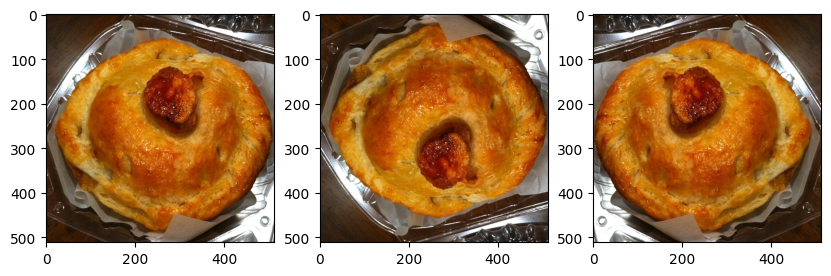

In [41]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

Brightness

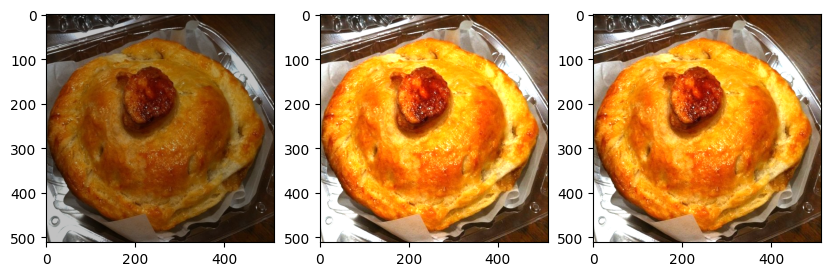

In [42]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)